# Adiabatic Flame Example

This example uses `ctwrap` for one-dimensional adiabatic premixed flame simulations defined by the simulation module `adiabatic_flame` (`ctwrap.modules.adiabatic_flame`).

## 1. Function/Class Definitions

In [1]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [2]:
import cantera as ct
import ctwrap as cw

## 2. Simulations

### 2.1 Create Simulation Object

Uses a module in the `modules` folder. Modules do not have to depend on `ctwrap`.

In [3]:
sim = cw.Simulation.from_module(cw.modules.adiabatic_flame)
sim

In [4]:
%%time
sim.run()

    defaults: mixture-averaged flamespeed = 0.711264 m/s
    defaults: multi-component flamespeed  = 0.727008 m/s
Wall time: 385 ms


### 2.2 Create Simulation Handler

In [5]:
s = cw.SimulationHandler.from_yaml('adiabatic_flame.yaml', verbosity=1)
s

Simulations for entry `upstream.phi` with values: [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]


### 2.3 Run Simulation Tasks in Parallel

In [6]:
%%time
s.run_parallel(sim, verbosity=0)

Wall time: 5.27 s


True

## 3. Create Graphical Output

In [7]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import pandas as pd
import numpy as np
col = mpl.rcParams['axes.prop_cycle'].by_key()['color']
n_col = len(col)

### 3.1 Load Data

In [8]:
data = h5py.File(s.output_name, 'r')

In [9]:
data.keys()

<KeysViewHDF5 ['upstream.phi_0.4<mix>', 'upstream.phi_0.4<multi>', 'upstream.phi_0.6<mix>', 'upstream.phi_0.6<multi>', 'upstream.phi_0.8<mix>', 'upstream.phi_0.8<multi>', 'upstream.phi_1.0<mix>', 'upstream.phi_1.0<multi>', 'upstream.phi_1.2<mix>', 'upstream.phi_1.2<multi>', 'upstream.phi_1.4<mix>', 'upstream.phi_1.4<multi>', 'upstream.phi_1.6<mix>', 'upstream.phi_1.6<multi>', 'upstream.phi_1.8<mix>', 'upstream.phi_1.8<multi>', 'upstream.phi_2.0<mix>', 'upstream.phi_2.0<multi>', 'upstream.phi_2.2<mix>', 'upstream.phi_2.2<multi>', 'upstream.phi_2.4<mix>', 'upstream.phi_2.4<multi>', 'upstream.phi_2.6<mix>', 'upstream.phi_2.6<multi>']>

In [10]:
phi = [(re.findall("\d+\.\d+", k)[0]) for k in data]
phi = np.unique(phi)

In [11]:
mix = {k.split('<')[0]: dict(data[k]['flame']) for k in data if 'mix' in k}
mlt = {k.split('<')[0]: dict(data[k]['flame']) for k in data if 'multi' in k}

### 3.2 Plot

Plot flame speeds and temperature profiles

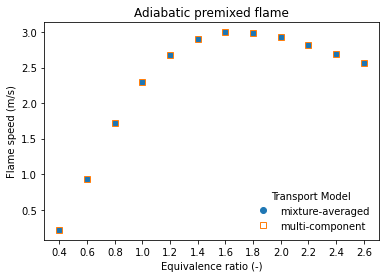

In [12]:
# create figure
fig, ax = plt.subplots(1)

# plot results
u_mix = [ mix[t]['velocity'][0] for t in mix]
u_mlt = [ mlt[t]['velocity'][0] for t in mlt]

ax.plot(phi, u_mix, marker='o', 
            linestyle='none', label='mixture-averaged') 
ax.plot(phi, u_mlt, marker='s', 
            markerfacecolor='none',
            linestyle='none', label='multi-component') 

# add title/axis labels
ax.set_xlabel('Equivalence ratio (-)')
ax.set_ylabel('Flame speed (m/s)')

ax.set_title('Adiabatic premixed flame')

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Transport Model') # % mech)
_ = leg.draw_frame(False) 

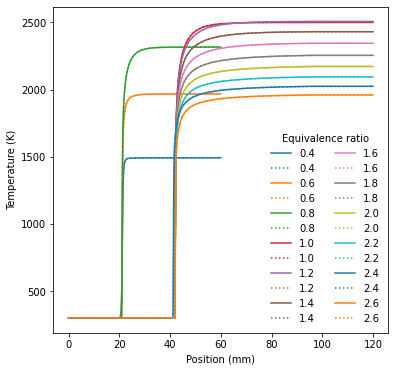

In [13]:
# create figure and adjust size
fig, ax = plt.subplots(1)
fig.set_size_inches(6.,6.)

# plot results
for i, key in enumerate(mix.keys()):
    df = mix[key]
    label = key.split('_')[1]
    ax.plot(1000*df['grid'][:], df['T'][:], color=col[i % n_col], 
            linestyle='-', label=label) 
    df = mlt[key]
    ax.plot(1000*df['grid'][:], df['T'][:], color=col[i % n_col], 
            linestyle=':', label=label) 

# add title/axis labels
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Equivalence ratio', ncol=2) # % mech)
_ = leg.draw_frame(False) 